# Importing libraries

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd


# Load data

In [4]:
kickstarter_df = pd.read_csv("./inputs/kickstarter_data_full.csv", low_memory=False)


# Drop unnecessary columns

In [5]:
kickstarter_df.drop(columns=["index", "Unnamed: 0"], inplace=True)


# Naive feature selection

In [6]:
kickstarter_df.drop(columns="id", inplace=True)


In [7]:
kickstarter_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20632 entries, 0 to 20631
Data columns (total 66 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   photo                        20632 non-null  object 
 1   name                         20632 non-null  object 
 2   blurb                        20626 non-null  object 
 3   goal                         20632 non-null  float64
 4   pledged                      20632 non-null  float64
 5   state                        20632 non-null  object 
 6   slug                         20632 non-null  object 
 7   disable_communication        20632 non-null  bool   
 8   country                      20632 non-null  object 
 9   currency                     20632 non-null  object 
 10  currency_symbol              20632 non-null  object 
 11  currency_trailing_code       20632 non-null  bool   
 12  deadline                     20632 non-null  object 
 13  state_changed_at

# Remove features with more that 50% missing values

In [8]:
kickstarter_df.drop(
    columns=["friends", "is_starred", "is_backing", "permissions"], inplace=True
)


# Remove features with zero variance

In [9]:
kickstarter_df.nunique()[kickstarter_df.nunique() == 1]


Series([], dtype: int64)

# Check rows with missing values

In [10]:
kickstarter_df.isnull().any(axis=1).sum()

1937

In [13]:
kickstarter_df[kickstarter_df[["currency", "pledged"]].isnull().any(axis=1)]

,photo,name,blurb,goal,pledged,state,slug,disable_communication,country,currency,...,launch_to_deadline,launch_to_state_change,create_to_launch_days,launch_to_deadline_days,launch_to_state_change_days,SuccessfulBool,USorGB,TOPCOUNTRY,LaunchedTuesday,DeadlineWeekend


# Check the cases of the "state" (dependent) variable

In [14]:
kickstarter_df["state"].value_counts()

state
failed        11416
successful     6018
canceled       2460
live            508
suspended       230
Name: count, dtype: int64

# Encode the "state" variable

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
label_encoder = LabelEncoder()

In [17]:
kickstarter_df_encoded = kickstarter_df.copy()

In [18]:
kickstarter_df_encoded["state"] = label_encoder.fit_transform(
    kickstarter_df_encoded["state"]
)

In [19]:
label_encoder.classes_

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [20]:
label_encoder.inverse_transform([0, 1, 2, 3, 4])

array(['canceled', 'failed', 'live', 'successful', 'suspended'],
      dtype=object)

In [21]:
kickstarter_df_encoded["state"].value_counts()

state
1    11416
3     6018
0     2460
2      508
4      230
Name: count, dtype: int64

# Hyphotesis 4: Is features like "currency" and "pleded" associatet with successness?

In [22]:
h4_df = kickstarter_df_encoded[
    ["currency", "pledged", "usd_pledged", "static_usd_rate", "state"]
]


In [23]:
h4_df

,currency,pledged,usd_pledged,static_usd_rate,state
0,USD,0.0,0.000000,1.000000,1
1,USD,0.0,0.000000,1.000000,1
2,USD,120.0,120.000000,1.000000,1
3,USD,0.0,0.000000,1.000000,1
4,EUR,356.0,396.802395,1.114613,1
...,...,...,...,...,...
20627,CHF,25868.0,25886.197879,1.000703,1
20628,EUR,1559.0,1644.428040,1.054797,1
20629,USD,0.0,0.000000,1.000000,1
20630,USD,0.0,0.000000,1.000000,1


# Convert to USD

In [24]:
def covert_to_usd(row, col_name):
    return (
        row[col_name] * row["static_usd_rate"]
        if row["static_usd_rate"] != 1
        else row[col_name]
    )


In [25]:
h4_df["usd_pledged"] = h4_df.apply(covert_to_usd, args=("pledged",), axis=1)

In [26]:
h4_df

,currency,pledged,usd_pledged,static_usd_rate,state
0,USD,0.0,0.000000,1.000000,1
1,USD,0.0,0.000000,1.000000,1
2,USD,120.0,120.000000,1.000000,1
3,USD,0.0,0.000000,1.000000,1
4,EUR,356.0,396.802395,1.114613,1
...,...,...,...,...,...
20627,CHF,25868.0,25886.197879,1.000703,1
20628,EUR,1559.0,1644.428040,1.054797,1
20629,USD,0.0,0.000000,1.000000,1
20630,USD,0.0,0.000000,1.000000,1


# Remove unnecessary columns

In [27]:
h4_df.drop(columns=["static_usd_rate", "pledged"], inplace=True)

In [28]:
h4_df

,currency,usd_pledged,state
0,USD,0.000000,1
1,USD,0.000000,1
2,USD,120.000000,1
3,USD,0.000000,1
4,EUR,396.802395,1
...,...,...,...
20627,CHF,25886.197879,1
20628,EUR,1644.428040,1
20629,USD,0.000000,1
20630,USD,0.000000,1


# Convert currency into dummies

In [29]:
currency_dummies = pd.get_dummies(h4_df["currency"], prefix="currency", drop_first=True)

In [30]:
# conert to int
currency_dummies = currency_dummies.astype(int)

In [31]:
currency_dummies

,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20627,0,1,0,0,0,0,0,0,0,0,0,0
20628,0,0,0,1,0,0,0,0,0,0,0,0
20629,0,0,0,0,0,0,0,0,0,0,0,1
20630,0,0,0,0,0,0,0,0,0,0,0,1


## Add the dummies to the h4_df and remove original column

In [32]:
h4_df = pd.concat([h4_df, currency_dummies], axis=1)

In [33]:
h4_df.drop(columns="currency", inplace=True)

In [34]:
h4_df.head()

,usd_pledged,state,currency_CAD,currency_CHF,currency_DKK,currency_EUR,currency_GBP,currency_HKD,currency_MXN,currency_NOK,currency_NZD,currency_SEK,currency_SGD,currency_USD
0,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1
1,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1
2,120.000000,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0.000000,1,0,0,0,0,0,0,0,0,0,0,0,1
4,396.802395,1,0,0,0,1,0,0,0,0,0,0,0,0


# Try the model with only faild and success

In [35]:
{i: label_encoder.inverse_transform([i])[0] for i in range(5)}

{0: 'canceled', 1: 'failed', 2: 'live', 3: 'successful', 4: 'suspended'}

In [36]:
h4_df_binary = h4_df.copy()

## Convert the values of state to be 1 if it in "successful" or "live" by their encoded values 3, 2

In [37]:
def convert_to_binary(row):
    return 1 if row["state"] in [3, 2] else 0

In [38]:
h4_df_binary["state"] = h4_df_binary.apply(convert_to_binary, axis=1)

In [39]:
h4_df_binary["state"].value_counts()

state
0    14106
1     6526
Name: count, dtype: int64

# Split into X and y again

In [40]:
X_binary = h4_df_binary.drop(columns="state")
y_binary = h4_df_binary["state"]

# Split into train and test again

In [42]:
from sklearn.model_selection import train_test_split
X_train_binary, X_test_binary, y_train_binary, y_test_binary = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42
)

# Define a new model

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_regression_model_binary = LogisticRegression()

# Fit the new model

In [44]:
logistic_regression_model_binary.fit(X_train_binary, y_train_binary)

LogisticRegression()

# Predict and results

In [45]:
logistic_regression_model_binary.score(X_test_binary, y_test_binary)

0.4447495961227787

In [46]:
predictions_binary = logistic_regression_model_binary.predict(X_test_binary)

In [47]:
test_results_binary = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_binary}
)

In [48]:
test_results_binary

,Actual,Predicted
13857,0,1
1710,1,1
9278,1,1
10786,0,1
19710,1,1
...,...,...
20486,0,1
13118,1,1
15890,0,1
13702,0,1


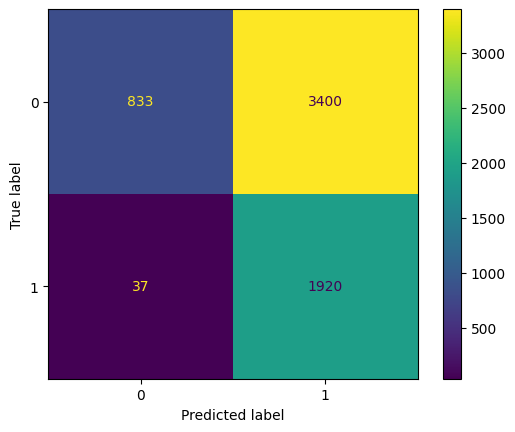

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test_binary, predictions_binary)
ConfusionMatrixDisplay(cm).plot()

In [50]:
from sklearn.metrics import classification_report
print(classification_report(y_test_binary, predictions_binary))

              precision    recall  f1-score   support

           0       0.96      0.20      0.33      4233
           1       0.36      0.98      0.53      1957

    accuracy                           0.44      6190
   macro avg       0.66      0.59      0.43      6190
weighted avg       0.77      0.44      0.39      6190



# KNN

In [51]:
# knn
from sklearn.neighbors import KNeighborsClassifier

In [133]:
knn = KNeighborsClassifier(n_neighbors=201)

In [134]:
knn.fit(X_train_binary, y_train_binary)

KNeighborsClassifier(n_neighbors=201)

In [135]:
predictions_knn = knn.predict(X_test_binary)

In [136]:
test_results_knn = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_knn}
)

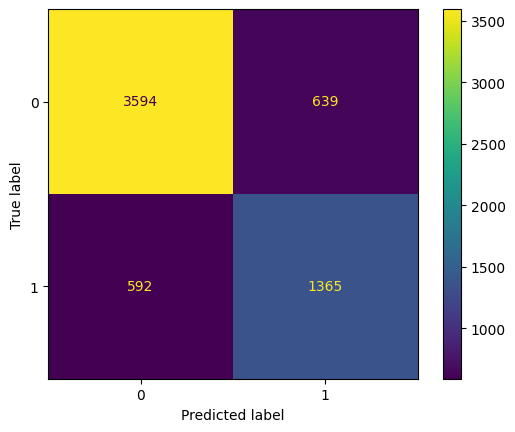

In [137]:
cm = confusion_matrix(y_test_binary, predictions_knn)
ConfusionMatrixDisplay(cm).plot()

In [138]:
print(classification_report(y_test_binary, predictions_knn))

              precision    recall  f1-score   support

           0       0.86      0.85      0.85      4233
           1       0.68      0.70      0.69      1957

    accuracy                           0.80      6190
   macro avg       0.77      0.77      0.77      6190
weighted avg       0.80      0.80      0.80      6190



# SVM

In [58]:
# svm
from sklearn.svm import SVC

In [59]:
svc_model = SVC()

In [60]:
svc_model.fit(X_train_binary, y_train_binary)

SVC()

In [61]:
predictions_svc = svc_model.predict(X_test_binary)

In [62]:
test_results_svc = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_svc}
)

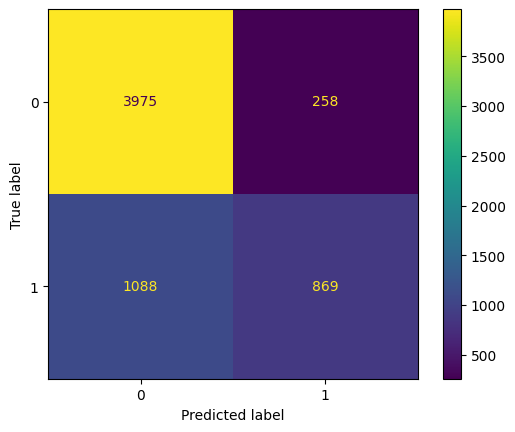

In [63]:
cm = confusion_matrix(y_test_binary, predictions_svc)
ConfusionMatrixDisplay(cm).plot()

In [64]:
print(classification_report(y_test_binary, predictions_svc))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4233
           1       0.77      0.44      0.56      1957

    accuracy                           0.78      6190
   macro avg       0.78      0.69      0.71      6190
weighted avg       0.78      0.78      0.76      6190



# SVM with rbf kernel

In [65]:
# svm with rbf kernel
svc_model_rbf = SVC(kernel="rbf")

In [66]:
svc_model_rbf.fit(X_train_binary, y_train_binary)

SVC()

In [67]:
predictions_svc_rbf = svc_model_rbf.predict(X_test_binary)

In [68]:
test_results_svc_rbf = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_svc_rbf}
)

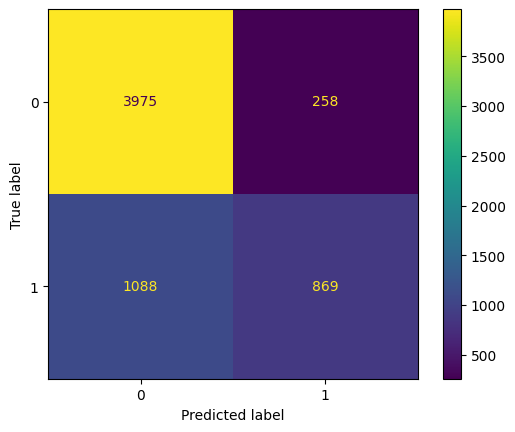

In [69]:
cm = confusion_matrix(y_test_binary, predictions_svc_rbf)
ConfusionMatrixDisplay(cm).plot()

In [70]:
print(classification_report(y_test_binary, predictions_svc_rbf))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86      4233
           1       0.77      0.44      0.56      1957

    accuracy                           0.78      6190
   macro avg       0.78      0.69      0.71      6190
weighted avg       0.78      0.78      0.76      6190



# SVM with poly kernel

In [71]:
# svm with poly kernel
svc_model_poly = SVC(kernel="poly")

In [72]:
svc_model_poly.fit(X_train_binary, y_train_binary)

SVC(kernel='poly')

In [73]:
predictions_svc_poly = svc_model_poly.predict(X_test_binary)

In [74]:
test_results_svc_poly = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_svc_poly}
)

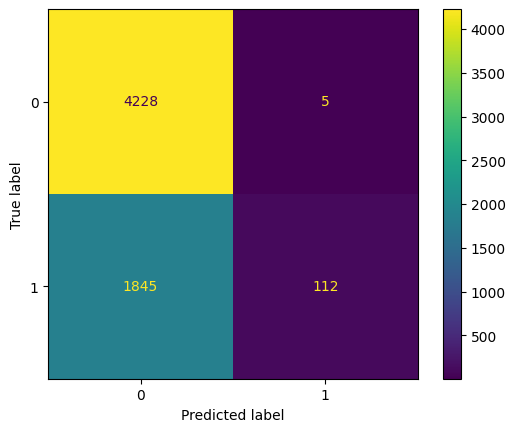

In [75]:
cm = confusion_matrix(y_test_binary, predictions_svc_poly)
ConfusionMatrixDisplay(cm).plot()

In [76]:
print(classification_report(y_test_binary, predictions_svc_poly))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82      4233
           1       0.96      0.06      0.11      1957

    accuracy                           0.70      6190
   macro avg       0.83      0.53      0.46      6190
weighted avg       0.78      0.70      0.60      6190



# SVM with sigmoid kernel

In [77]:
# svm with sigmoid kernel
svc_model_sigmoid = SVC(kernel="sigmoid")

In [78]:
svc_model_sigmoid.fit(X_train_binary, y_train_binary)

SVC(kernel='sigmoid')

In [79]:
predictions_svc_sigmoid = svc_model_sigmoid.predict(X_test_binary)

In [80]:
test_results_svc_sigmoid = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_svc_sigmoid}
)

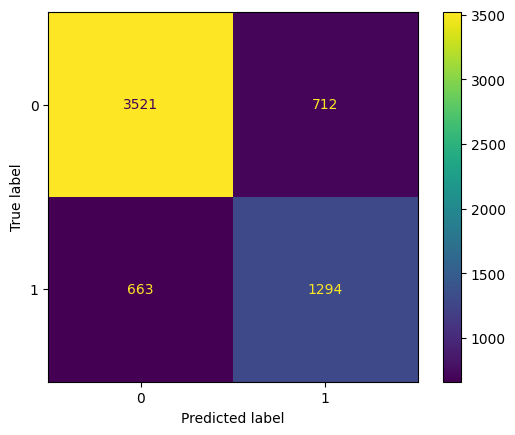

In [81]:
cm = confusion_matrix(y_test_binary, predictions_svc_sigmoid)
ConfusionMatrixDisplay(cm).plot()

In [82]:
print(classification_report(y_test_binary, predictions_svc_sigmoid))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      4233
           1       0.65      0.66      0.65      1957

    accuracy                           0.78      6190
   macro avg       0.74      0.75      0.74      6190
weighted avg       0.78      0.78      0.78      6190



# Random forest

In [83]:
# random forest
from sklearn.ensemble import RandomForestClassifier

In [84]:
rnf_model = RandomForestClassifier()

In [85]:
rnf_model.fit(X_train_binary, y_train_binary)

RandomForestClassifier()

In [86]:
predictions_rnf = rnf_model.predict(X_test_binary)

In [87]:
test_results_rnf = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_rnf}
)

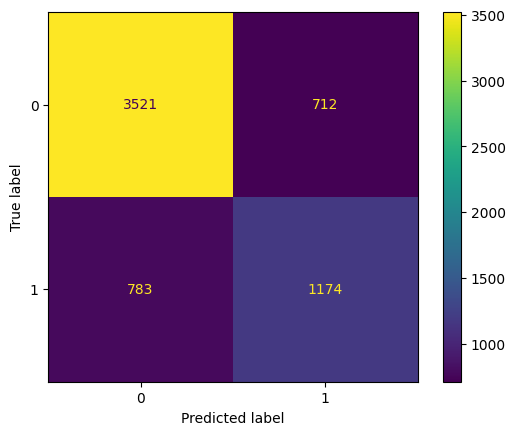

In [88]:
cm = confusion_matrix(y_test_binary, predictions_rnf)
ConfusionMatrixDisplay(cm).plot()

In [89]:
print(classification_report(y_test_binary, predictions_rnf))

              precision    recall  f1-score   support

           0       0.82      0.83      0.82      4233
           1       0.62      0.60      0.61      1957

    accuracy                           0.76      6190
   macro avg       0.72      0.72      0.72      6190
weighted avg       0.76      0.76      0.76      6190



In [141]:
l = []
for i in range(100, 1000, 50):
    rnf_model = RandomForestClassifier(n_estimators=i, random_state=42)
    rnf_model.fit(X_train_binary, y_train_binary)
    l.append((i, rnf_model.score(X_test_binary, y_test_binary)))

In [142]:
l.sort(key=lambda x: x[1], reverse=True)

In [143]:
l

[(150, 0.7589660743134087),
 (250, 0.7589660743134087),
 (350, 0.7588045234248788),
 (200, 0.7586429725363489),
 (300, 0.7586429725363489),
 (700, 0.7583198707592892),
 (750, 0.7581583198707593),
 (800, 0.7581583198707593),
 (100, 0.7579967689822295),
 (650, 0.7579967689822295),
 (400, 0.7578352180936995),
 (850, 0.7578352180936995),
 (550, 0.7576736672051696),
 (600, 0.7576736672051696),
 (900, 0.7576736672051696),
 (450, 0.7575121163166397),
 (500, 0.7575121163166397),
 (950, 0.7573505654281099)]

In [90]:
# logistic regression with class weights
logistic_regression_model_binary_weighted = LogisticRegression(class_weight="balanced")

In [91]:
logistic_regression_model_binary_weighted.fit(X_train_binary, y_train_binary)

LogisticRegression(class_weight='balanced')

In [92]:
predictions_binary_weighted = logistic_regression_model_binary_weighted.predict(
    X_test_binary
)

In [93]:
test_results_binary_weighted = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_binary_weighted}
)

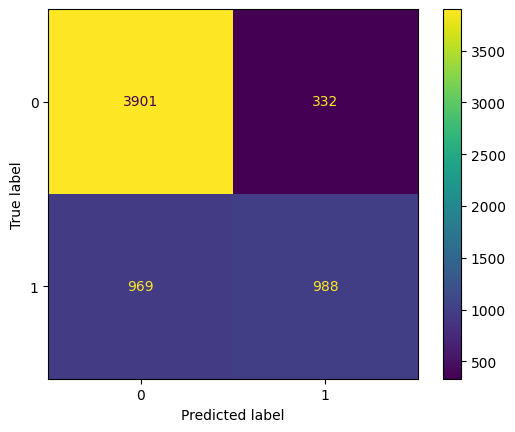

In [94]:
cm = confusion_matrix(y_test_binary, predictions_binary_weighted)
ConfusionMatrixDisplay(cm).plot()

In [95]:
print(classification_report(y_test_binary, predictions_binary_weighted))

              precision    recall  f1-score   support

           0       0.80      0.92      0.86      4233
           1       0.75      0.50      0.60      1957

    accuracy                           0.79      6190
   macro avg       0.77      0.71      0.73      6190
weighted avg       0.78      0.79      0.78      6190



In [96]:
# decision tree
from sklearn.tree import DecisionTreeClassifier

In [97]:
dt_model = DecisionTreeClassifier()

In [98]:
dt_model.fit(X_train_binary, y_train_binary)

DecisionTreeClassifier()

In [99]:
predictions_dt = dt_model.predict(X_test_binary)

In [100]:
test_results_dt = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_dt}
)

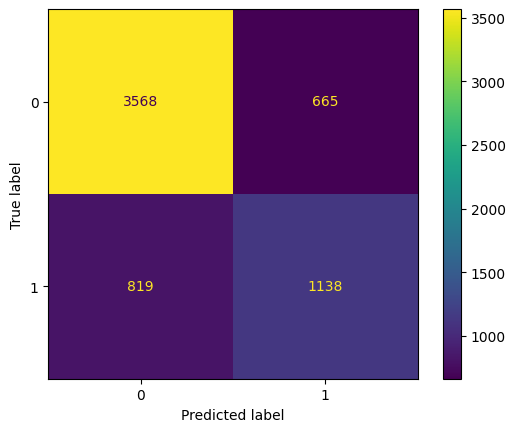

In [101]:
cm = confusion_matrix(y_test_binary, predictions_dt)
ConfusionMatrixDisplay(cm).plot()

In [102]:
print(classification_report(y_test_binary, predictions_dt))

              precision    recall  f1-score   support

           0       0.81      0.84      0.83      4233
           1       0.63      0.58      0.61      1957

    accuracy                           0.76      6190
   macro avg       0.72      0.71      0.72      6190
weighted avg       0.76      0.76      0.76      6190



In [103]:
import plotly.graph_objects as go

In [104]:
# plot roc curve
from sklearn.metrics import roc_curve, roc_auc_score
roc_auc = roc_auc_score(y_test_binary, predictions_binary)
fpr, tpr, thresholds = roc_curve(y_test_binary, predictions_binary)

In [105]:
fig = go.Figure()
fig.add_trace(
    go.Scatter(
        x=fpr,
        y=tpr,
        mode="lines",
        name="ROC curve (area = %0.2f)" % roc_auc,
        line=dict(color="darkorange", width=2),
    )
)
fig.add_trace(
    go.Scatter(
        x=[0, 1],
        y=[0, 1],
        mode="lines",
        name="Random guess",
        line=dict(color="navy", width=2, dash="dash"),
    )
)
fig.update_layout(
    title="Receiver Operating Characteristic",
    xaxis_title="False Positive Rate",
    yaxis_title="True Positive Rate",
)
fig.show()

In [106]:
# threshold 0.3
predictions_binary_threshold_03 = logistic_regression_model_binary.predict_proba(
    X_test_binary
)[:, 1] > 0.3

In [107]:
predictions_binary_threshold_03 = predictions_binary_threshold_03.astype(int)

In [108]:
test_results_binary_threshold_03 = pd.DataFrame(
    {"Actual": y_test_binary, "Predicted": predictions_binary_threshold_03}
)

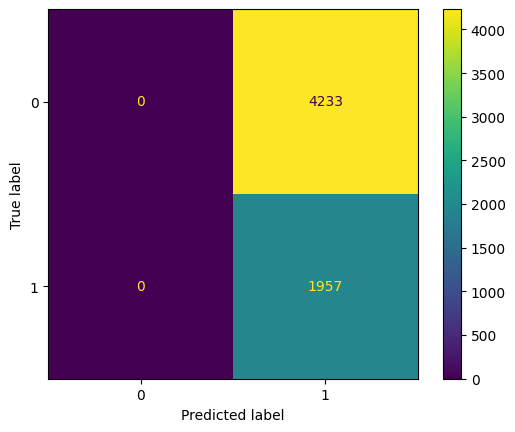

In [109]:
cm = confusion_matrix(y_test_binary, predictions_binary_threshold_03)
ConfusionMatrixDisplay(cm).plot()

In [124]:
print(classification_report(y_test_binary, predictions_binary_threshold_03))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85      3909
           1       0.67      0.53      0.60      1700

    accuracy                           0.78      5609
   macro avg       0.74      0.71      0.72      5609
weighted avg       0.77      0.78      0.77      5609

